# Домашняя работа №2
Панов А.А, Шестаков А.В. Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Срок сдачи:** 12 марта 2016, 23:59 <br\>
**Штраф за опоздание:** -0.5 за каждый день

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [minor-da-16] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

## 1. Теория веротяностей. Распределения

В SciPy более 80 видов непрерывных и более 12 дискретных распределений, более 70 статистических функций

In [167]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stat
import statistics as st

%matplotlib inline

**Задача 1.** Сгенерируйте три распределения: гауссовское с мат. ожиданием 1 и дисперсией 4, хи-квадрат с $k = 3$ и дискртеное пуассоновское с $\lambda = 10$.<br/> 

При генерации используйте 500 точек. Посчитайте для каждого из них обчный набор статистик: среднее, минимум, максимум, дисперсию, кривизну и смещенность.

In [168]:
norm = stats.norm.rvs(1,4, size=500)
chi = stats.chi2.rvs(3, size=500)
pois = stats.poisson.rvs(10, size=500)

**Задача 2.** Найрисуйте функцию (cdf) и плотность (pdf) распределений. На графиках pdf отметьте среднее значение и медиану.

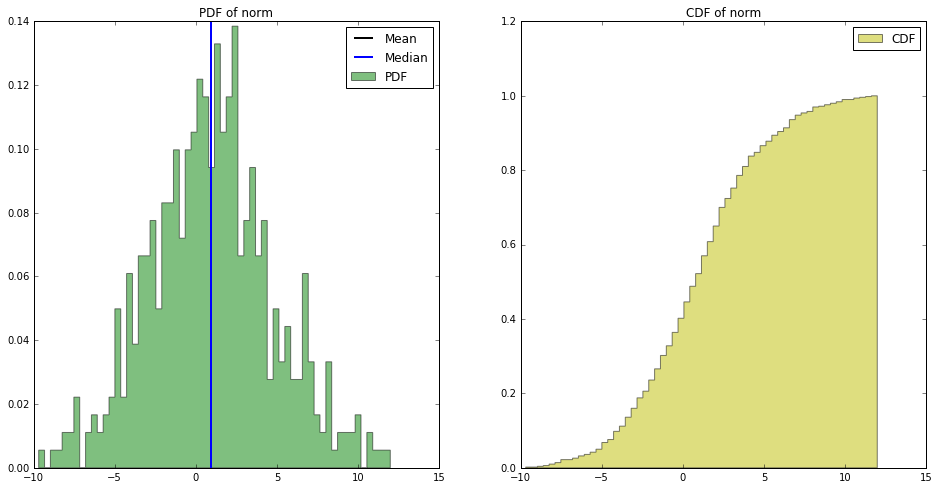

In [169]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
ax1.hist(norm, 60, normed=True, histtype='stepfilled', color='g', alpha=0.5, label='PDF')
ax1.set_title('PDF of norm')
ax2.hist(norm, bins=60, normed=True, histtype='stepfilled', color='y', cumulative=1, alpha = 0.5, label = 'CDF')
ax2.set_title('CDF of norm')
mean=st.mean(norm)
median=st.median(norm)
ax1.axvline(mean, color='black', linewidth=2, label ='Mean') 
ax1.axvline(median, color='blue', linewidth=2, label ='Median') 
ax1.legend()
ax2.legend()
plt.show()

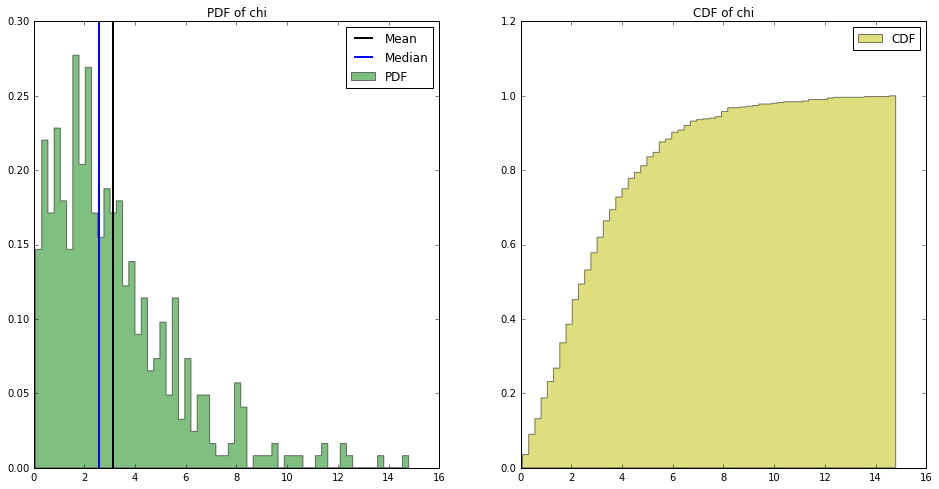

In [170]:
fig, (ax3, ax4) = plt.subplots(ncols=2, figsize=(16, 8))
ax3.hist(chi, 60, normed=True, histtype='stepfilled', color='g', alpha=0.5, label='PDF')
ax3.set_title('PDF of chi')
ax4.hist(chi, bins=60, normed=True, histtype='stepfilled', color='y', cumulative=1, alpha = 0.5, label = 'CDF')
ax4.set_title('CDF of chi')
mean=st.mean(chi)
median=st.median(chi)
ax3.axvline(mean, color='black', linewidth=2, label ='Mean') 
ax3.axvline(median, color='blue', linewidth=2, label ='Median') 
ax3.legend()
ax4.legend()
plt.show()

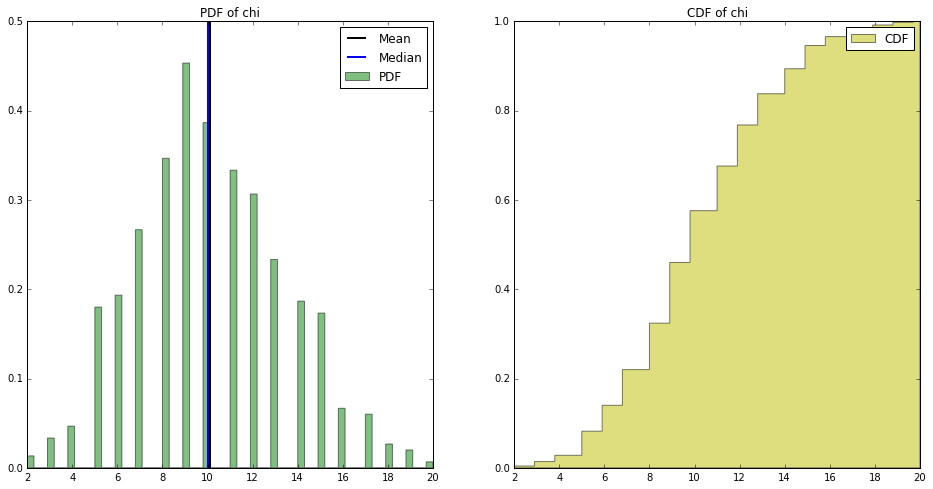

In [171]:
fig, (ax5, ax6) = plt.subplots(ncols=2, figsize=(16, 8))
ax5.hist(pois, 60, normed=True, histtype='stepfilled', color='g', alpha=0.5, label='PDF')
ax5.set_title('PDF of chi')
ax6.hist(pois, bins=60, normed=True, histtype='stepfilled', color='y', cumulative=1, alpha = 0.5, label = 'CDF')
ax6.set_title('CDF of chi')
mean=st.mean(pois)
median=st.median(pois)
ax5.axvline(mean, color='black', linewidth=2, label ='Mean') 
ax5.axvline(median, color='blue', linewidth=2, label ='Median') 
ax5.legend()
ax6.legend()
plt.show()

**Задача 3.** Выведите описательные статистики распределений с помощью `scipy.stats.describe`. 

In [172]:
sp.stats.describe(norm)

DescribeResult(nobs=500, minmax=(-9.6848594266342793, 11.975508591135512), mean=0.94879525753793159, variance=14.413764677588278, skewness=0.12649565456285244, kurtosis=0.05585258467568677)

In [173]:
sp.stats.describe(chi)

DescribeResult(nobs=500, minmax=(0.075444241715797625, 14.789053880114574), mean=3.1299553961382149, variance=5.8244642892467011, skewness=1.4856599279850506, kurtosis=2.9150229661409988)

In [174]:
sp.stats.describe(pois)

DescribeResult(nobs=500, minmax=(2, 20), mean=10.09, variance=10.907715430861725, skewness=0.2433986507120874, kurtosis=-0.23981475837772903)

## 2. Теория вероятностей. Корреляция и метод максимального правдоподобия

Корреляции с помощью ивестных вам пакетов можно посчитать несколькими способами: pandas.DataFrame.corr и numpy.correlate, numpy.corrcoef и scipy.stats.pearsonr для корреляционного коэффициента Пирсона, scipy.stats.spearmanr для корреляционного коэффициента Спирмена.

Объясните [разницу](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) между коэффициентами корреляции Спирмена и Пирсона.

Коэффициент корреляции Пирсона

Линейный корреляционный анализ позволяет установить прямые связи между переменными величинами по их абсолютным значениям. Формула расчета коэффициента корреляции построена таким образом, что если связь между признаками имеет линейный характер, коэффициент Пирсона точно устанавливает тесноту этой связи. Поэтому он называется также коэффициентом линейной корреляции Пирсона.

Коэффициент корреляции рангов Спирмена

Коэффициент корреляции рангов, предложенный К. Спирменом, относится к непараметрическим показателям связи между переменными, измеренными в ранговой шкале. При расчете этого коэффициента не требуется никаких предположений о характере распределений признаков в генеральной совокупности. Этот коэффициент определяет степень тесноты связи порядковых признаков, которые в этом случае представляют собой ранги сравниваемых величин.

Величина коэффициента корреляции Спирмена также лежит в интервале +1 и -1. Он, как и коэффициент Пирсона, может быть положительным и отрицательным, характеризуя направленность связи между двумя признаками, измеренными в ранговой шкале.

В данных из файла [beauty.csv](https://www.dropbox.com/s/xio77e9p0oe1wqw/beauty.csv?dl=0) для каждого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

**Задание 1.** Найдите 3 пары признаков с наибольшей корреляцией. Поясните на конктретных примерах, что означают полученные коэффициенты корреляции.

In [175]:
beauty = pd.DataFrame.from_csv('../data/beauty.csv', sep = ';') 
beauty.reset_index(level=0, inplace=True) 
beauty.head(5)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [198]:
corr = beauty.corr(method = 'pearson', min_periods=1)
corr_array = np.array(corr)
for i in range(10):
    for j in range(10):
        if corr_array[i][j] == 1:
            corr_array[i][j] = 0
        corr_array[i][j] = abs(corr_array[i][j])
unique = np.unique(corr_array)
sort = unique[::-1]
ans = sort[:3]
ans

array([ 0.31922793,  0.31341944,  0.30162847])

In [199]:
a = corr.columns
b = corr.index
for i in range(10):
    for j in range(10):
        for _ in range(3):
            if abs(corr_array[i][j]) == ans[_]:
                print(a[i], b[j])

wage female
female wage
female married
married female
service educ
educ service


Полученные коэффициенты корреляции показывают, насколько изменится один признак при изменении другого признака на единицу. Например, если коэффициент между wage и female равен 0.31, то при изменении wage на единицу, female изменится на 0.31

**Задание 2.** На семинаре мы рассмотрели различные распрелеления случайных величин (дискретные и непрерывные). 

Изобразите гистограммы каждого из признаков.<br/>
Определите возможный закон распределения каждого из них и оцените его параметры. Если готовой функции в scipy.stats для распределения нет, то оцените эти параметры сами по методу максимального правдоподобия.

In [ ]:
x = beauty['wage']
plt.hist(x)

Для столбца wage подходит распределение хи квадрат с 5 степенями свободы

In [ ]:
plt.hist(stats.chi2.rvs(5, size=500), normed = True) 
plt.hist(beauty['wage'], normed = True, bins = 30, alpha = 0.7) 
plt.show()

plt.hist(stats.chi2.rvs(5, size=500), normed = True) 
plt.hist(beauty['wage'], normed = True, bins = 30, alpha = 0.7) 
plt.show()

In [ ]:
x = beauty['exper']
plt.hist(x)

Для столбца exper может подойти положительная часть нормального распеделения с mu=7, var=13:

In [ ]:
plt.hist(stats.norm.rvs(7, 13, size=500), normed = True) 
plt.hist(beauty['exper'], normed = True, bins = 30, alpha = 0.7) 
plt.show()

In [ ]:
x = beauty['union']
plt.hist(x)

Возможным распределением для столбца union может быть распределение Бернулли с параметром p=0,33
Аналогично для столбцов со схожими данными далее

In [ ]:
plt.hist(stats.bernoulli.rvs(0.33, size=500), normed = True) 
plt.hist(beauty['union'], normed = True, bins = 10, alpha = 0.5) 
plt.show()

In [ ]:
x = beauty['goodhlth']
plt.hist(x)

In [ ]:
plt.hist(stats.bernoulli.rvs(0.9, size=500), normed = True) 
plt.hist(beauty['goodhlth'], normed = True, bins = 10, alpha = 0.5) 
plt.show()

In [ ]:
x = beauty['black']
plt.hist(x)

In [ ]:
plt.hist(stats.bernoulli.rvs(0.1, size=500), normed = True) 
plt.hist(beauty['black'], normed = True, bins = 10, alpha = 0.5) 
plt.show()

In [ ]:
x = beauty['female']
plt.hist(x)

In [ ]:
plt.hist(stats.bernoulli.rvs(0.33, size=500), normed = True) 
plt.hist(beauty['female'], normed = True, bins = 10, alpha = 0.5) 
plt.show()

In [ ]:
x = beauty['married']
plt.hist(x)

In [ ]:
plt.hist(stats.bernoulli.rvs(0.7, size=500), normed = True) 
plt.hist(beauty['married'], normed = True, bins = 10, alpha = 0.5) 
plt.show()

In [ ]:
x = beauty['service']
plt.hist(x)

In [ ]:
plt.hist(stats.bernoulli.rvs(0.1, size=500), normed = True) 
plt.hist(beauty['black'], normed = True, bins = 10, alpha = 0.5) 
plt.show()

In [ ]:
x = beauty['educ']
plt.hist(x)

In [ ]:
x = beauty['looks']
plt.hist(x)

## 3. Метод наивного Байеса

Пояснения по выполнению этого задания будут рассказаны на семинаре 1 марта

Обучение методом наивного Байеса основывается на достаточно сильном предположении, что все признаки попарно независимы. По формуле Байеса $$P(y|x_1,\dots,x_n)=\frac{P(y)P(x_1,\dots,x_n|y)}{P(x_1,\dots,x_n)}.$$ В предположении, что признаки независимы получаем, что $$P(y|x_1,\dots,x_n)=\frac{P(y)\prod_{i=1}^n P(x_i|y)}{P(x_1,\dots,x_n)}$$
Т.к. $$P(x_1,\dots,x_n)$$ задается условиями задачи, принцип максимального правдоподобия для наивного Байеса запишется следующим образом: $$\hat y = \arg\max_y P(y)\prod_{i=1}^n P(x_i|y).$$


Библиотека `sklearn` поддерживает несколько реализаций наивного Байеса: `sklearn.naive_bayes.GaussianNB`, `sklearn.naive_bayes.MultinomialNB` и др.

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

**Задание 1.** Выберите 2 категории новостных сообщений из `20newsgroups`. Случайным образом, в пропорции 70/30, разделите наборы текстов на обучающую и контрольную выборки. В результате выполнения данного задания у вас должно получится 5 переменных: `text_all`, `text_train`, `text_test`, `y_train`, `y_test`.

In [ ]:
# Список новостных заголовков
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
## Your code here

**Задание 2.** На переменной `text` постройте конвертер из текстов в частотную матрицу с помощью метода `CountVectorizer(analyzer='word', stop_words='english', lowercase=True)`, а затем используйте его на выборках `train` и `test`. В результате вы должны получить 2 матрицы: `X_train` и `X_test`.

In [ ]:
## Your code here

**Задание 3.** По матрице `X_train` найдите 50 самых частотных слов. Соответствия столбцов и слов можно понять по методу `CountVectorizer.get_feature_names()`.

In [ ]:
## Your code here

**Задание 4.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=1` на выборке train. Примените его к данным из тестовой выборке и оцените точность совпадения меток.

In [ ]:
## Your code here

**Задание 5.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=0` на выборке train. Примените его к данным из тестовой выборки и оцените точность совпадения меток. Поменяются ли результаты? Объясните почему?

Учитывайте не только метки, но и вероятности, которые выдает классификатор

In [ ]:
## Your code here